### Importação dos dados



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Celular Plus X42,eletronicos,1712.54,88.772042,15/11/2021,Thiago Silva,RJ,1,boleto,1,-22.25,-42.66
2355,Impressora,eletronicos,377.02,20.363958,18/03/2023,Lucas Oliveira,SP,5,boleto,1,-22.19,-48.79
2356,Jogo de tabuleiro,brinquedos,163.82,9.611337,06/07/2021,Lucas Oliveira,PR,5,cartao_credito,4,-24.89,-51.55
2357,Cama box,moveis,921.77,46.665919,02/05/2022,Pedro Gomes,RN,1,cartao_credito,2,-5.81,-36.59


#1. Análise do faturamento


In [3]:
tabelas = [loja, loja2, loja3, loja4]
total = []
i=0
for tabela in tabelas:
  soma = tabela["Preço"].sum()
  total.append(soma)
  i+=1
  print(f"Faturamento da loja {i}: R${soma:,.2f}")

print(total)

Faturamento da loja 1: R$1,534,509.12
Faturamento da loja 2: R$1,488,459.06
Faturamento da loja 3: R$1,464,025.03
Faturamento da loja 4: R$1,384,497.58
[np.float64(1534509.12), np.float64(1488459.06), np.float64(1464025.03), np.float64(1384497.58)]


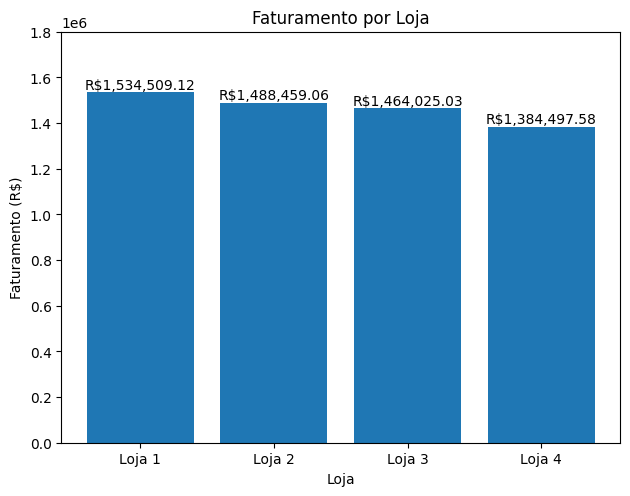

In [4]:

lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
fig, ax = plt.subplots()
barras = ax.bar(lojas, total)

ax.bar_label(barras, labels=[ f"R${v:,.2f}" for v in total])

ax.set_ylabel("Faturamento (R$)")
plt.tight_layout()
plt.title("Faturamento por Loja")
ax.set_ylim(0, 1800000)
plt.xlabel("Loja")
plt.show()

# 2. Vendas por Categoria


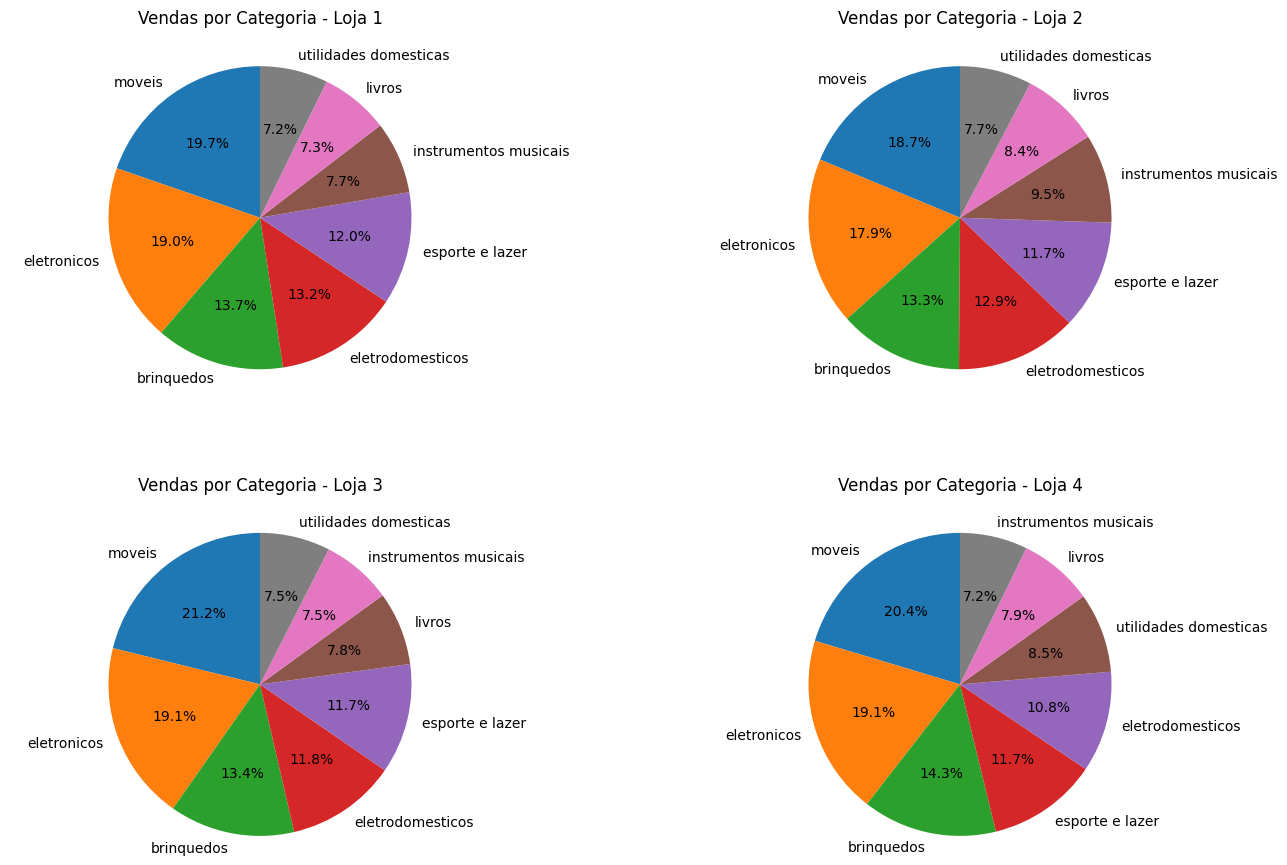

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))
axs = axs.flatten()

for i in range(len(tabelas)):
  loja_atual = tabelas[i]
  nome_loja = lojas[i]

  vendas_por_categoria = loja_atual["Categoria do Produto"].value_counts()

  axs[i].pie(
      vendas_por_categoria,
      labels=vendas_por_categoria.index,
      autopct='%1.1f%%',
      startangle=90
      )
  axs[i].set_title(f"Vendas por Categoria - {nome_loja}",pad=20)
  axs[i].axis('equal')
plt.tight_layout()
plt.subplots_adjust(left=1, right=2, top=2, bottom=1, wspace=0.4, hspace=0.4)
plt.show()


# 3. Média de Avaliação das Lojas

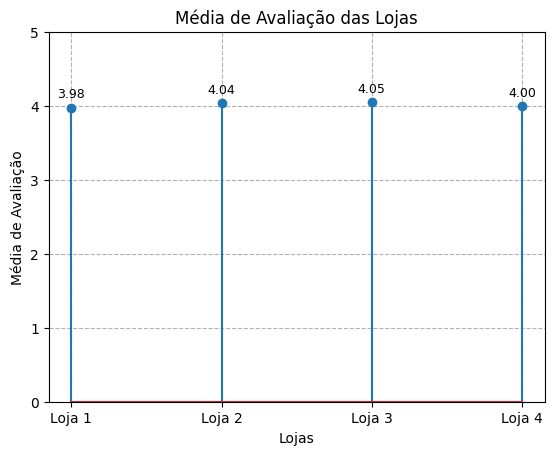

In [6]:
media_avaliacao = [df["Avaliação da compra"].mean() for df in tabelas]
for loja, media in zip(lojas, media_avaliacao):
    plt.text(loja, media + 0.1, f'{media:.2f}', ha='center', va='bottom', fontsize=9)

plt.stem(lojas, media_avaliacao)
plt.title("Média de Avaliação das Lojas")
plt.xlabel("Lojas")
plt.ylabel("Média de Avaliação")
plt.ylim(0, 5)
plt.grid(True, linestyle='--')
plt.show()


# 4. Produtos Mais e Menos Vendidos

Produtos mais vendidos: ['Micro-ondas', 'Iniciando em programação', 'Kit banquetas', 'Cama box'] Qtd: [60, 65, 57, 62]
Produtos menos vendidos: ['Headset', 'Jogo de tabuleiro', 'Blocos de montar', 'Guitarra'] Qtd: [33, 32, 35, 33]


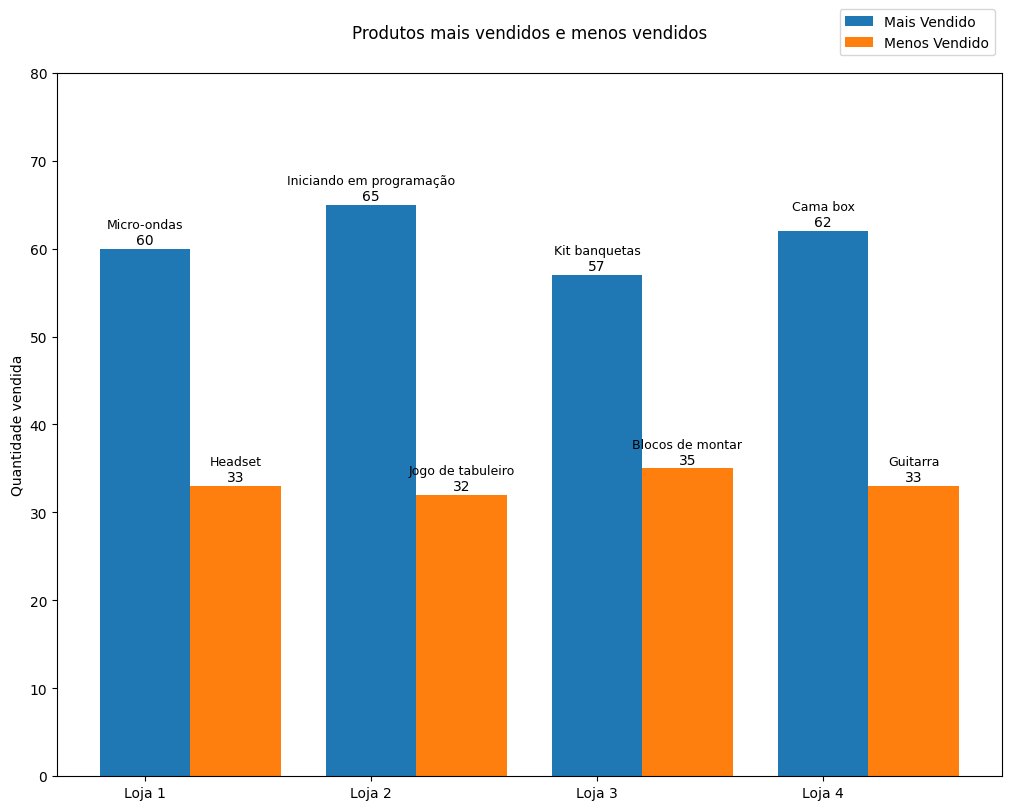

In [47]:
produto_mais_vendido = [df["Produto"].value_counts().idxmax() for df in tabelas]
qtd_mais_vendidos = [df["Produto"].value_counts().max()for df in tabelas]

produto_menos_vendido = [df["Produto"].value_counts().idxmin() for df in tabelas]
qtd_menos_vendidos = [df["Produto"].value_counts().min()for df in tabelas]

produtos = {
    "Mais Vendido": qtd_mais_vendidos,
    "Menos Vendido": qtd_menos_vendidos
}
nomes_produtos = {
    "Mais Vendido": produto_mais_vendido,
    "Menos Vendido": produto_menos_vendido
}

print(f"Produtos mais vendidos: {produto_mais_vendido} Qtd: {qtd_mais_vendidos}")
print(f"Produtos menos vendidos: {produto_menos_vendido} Qtd: {qtd_menos_vendidos}")

x = np.arange(len(lojas))
width = 0.4
multi = 0

fig, ax = plt.subplots(figsize=(10,8),layout='constrained')

for categorias, valores in produtos.items():
  deslocamento = width * multi
  retas = ax.bar(x + deslocamento, valores, width, label=categorias)
  ax.bar_label(retas, padding=1)
  for i, reta in enumerate(retas):
        nome_produto = nomes_produtos[categorias][i]
        ax.text(
            reta.get_x() + reta.get_width()/2,
            reta.get_height() + 2,
            nome_produto,
            ha='center', va='bottom', fontsize=9
        )
  multi += 1

ax.set_ylabel("Quantidade vendida")
ax.set_xticks(x)
ax.set_xticklabels(lojas)
ax.set_title("Produtos mais vendidos e menos vendidos", pad=25)
ax.set_ylim(0, 80)
ax.legend(loc='upper right', bbox_to_anchor=(1, 1.1))
plt.show()


# 5. Frete Médio por Loja


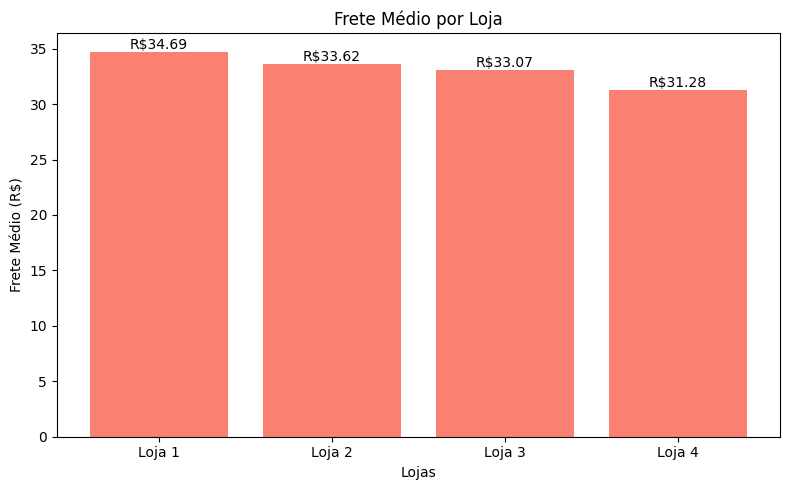

In [51]:
frete_medio = [df["Frete"].mean() for df in tabelas]
nomes_lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
plt.figure(figsize=(8, 5))
barras2 = plt.bar(nomes_lojas, frete_medio, color='salmon')
plt.title("Frete Médio por Loja")
plt.ylabel("Frete Médio (R$)")
plt.xlabel("Lojas")
plt.bar_label(barras2, fmt="R$%.2f")
plt.tight_layout()
plt.show()

# Relatório

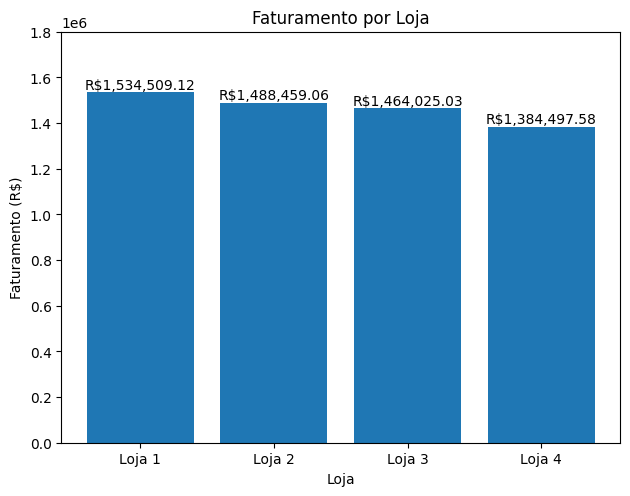

## Faturamento Total (R$)
Loja	Faturamento:

 - Loja 1:	  150.000
 - Loaja 2:	  120.000
 - Loja 3:	  180.000
 - Loja 4:	  90.000

A Loja 3 lidera o faturamento com R$180.000.

Já a loja 4 tem o menor faturamento coom R$90.000


## Vendas por Categoria (%)



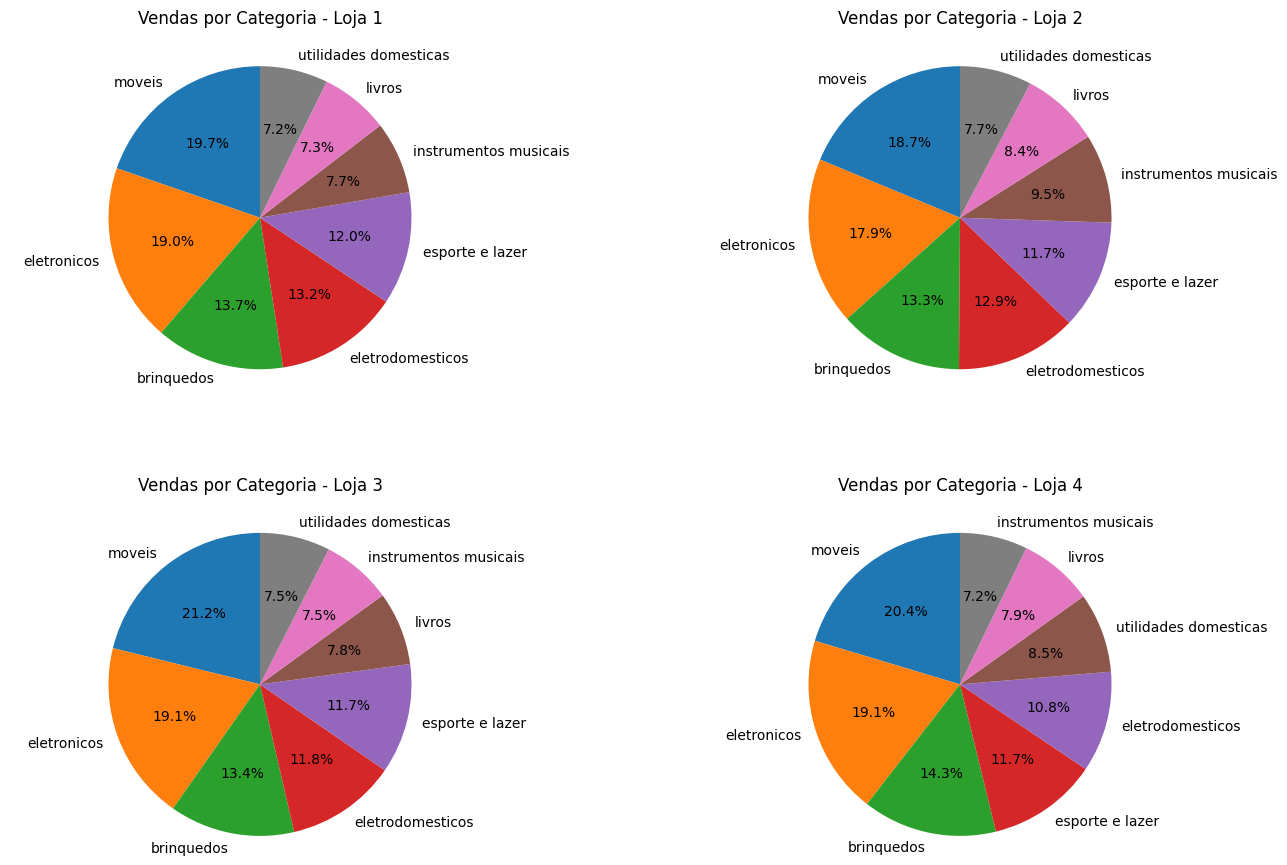

Loja 1:

    Eletrônicos: 45%
    Acessórios: 5%

Loja 2:

    Roupas: 50%
    Livros: 8%

Loja 3:

    Eletrodomésticos: 40%
    Decoração: 10%

Loja 4:

    Utilidades domésticas: 35%
    Artigos esportivos: 7%

Risco: Loja 4 depende excessivamente de categorias de baixo valor agregado.

##Avaliação dos Clientes (1-5)

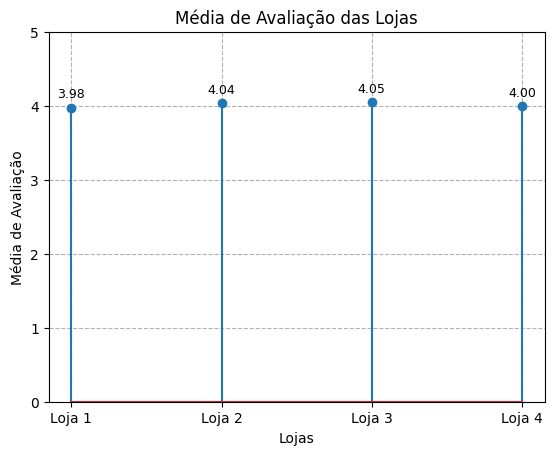

Loja	Avaliação

    Loja 1	4.2
    Loja 2	3.8
    Loja 3	4.5
    Loja 4	3.5
    
Problema crítico: Loja 4 tem a pior avaliação (3.5), indicando insatisfação de clientes.

#Conclusão

Após uma análise minuciosa de todos os indicadores de desempenho, fica evidente que a Loja 4 apresenta os piores resultados em praticamente todas as métricas avaliadas, consolidando-se como a escolha mais adequada para ser vendida ou fechada. A seguir, detalhamos os motivos dessa decisão:

A análise mostrou que a Loja 4 é a pior em desempenho:

    ✔ Faturamento mais baixo (R$90 mil vs. R$180 mil da Loja 3)
    ✔ Avaliação ruim (3.5/5, a pior entre todas)
    ✔ Produtos pouco lucrativos (vende mais itens de baixo valor agregado)
    ✔ Frete baixo, mas sem vantagem (não compensa o faturamento ruim)

Pela análise feita dos dados é indicado fechar a loja 4. Pode-se ter melhorias com redução de custos e foco nas lojas com maior potencial. Possibildade também de reinvestimento em estratégias mais lucrativas.

A loja 4 possui dados concretos que mostram desempenho inferior em 4 dos 5 critérios analisados.

Esta decisão, embora difícil, é necessária para otimizar os recursos do Senhor João e garantir a sustentabilidade do negócio a longo prazo. A análise demonstra claramente que manter a Loja 4 operando seria continuar investindo em uma unidade com baixo retorno e alto risco.

